# **Trabajo4 : Estadística y Análisis Exploratorio**

**Integrantes:**
- Andrés Camilo Henao Serna.
- Anderson Fabian Blanco.
- Isabel Cristina Suárez Roldán.

**Utilizando su base de datos del trabajo #3 realizar:**

In [17]:
import pandas as pd

df = pd.read_csv("DatosTrabajo3EAE20251.txt", sep='\s+', engine='python')
df.columns = df.columns.str.replace('"', '')  # Eliminamos comillas de los nombres de las columnas

print(df.head())

     Y    X1    X2    X3    X4   X5
0  3.4  8.45  38.8  12.9  85.0  235
1  4.1  9.35  53.8  15.9  80.9  833
2  4.3  8.67  48.2  24.4  90.8  182
3  4.3  9.23  51.6  11.6  42.6  620
4  2.7  8.34  56.9   8.1  74.0  107


In [36]:
#Importamos librerias generales para desarrollar el taller

import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.stattools import durbin_watson
import math
import statsmodels.stats.diagnostic as smd
from sklearn.metrics import mean_squared_error
from statsmodels.stats.diagnostic import het_breuschpagan
import itertools
from sklearn.feature_selection import SequentialFeatureSelector

**Nota:** Para el desarrollo de los diferentes ejercicios se implementara el conteo desde i+1 para obtener las observaciones desde 1 y no desde 0. Por mejor interpretación visual.

**1.** Identificación de observaciones atípicas (outliers), puntos de balanceo, observaciones influenciales. Analice si debe eliminarlas en el contexto dado.

In [20]:
# 1. Identificación de Outliers: 

# 1.1 Residuales estandarizados:

# Definir variable dependiente e independientes (ajustar según contexto)
y = df["Y"] 
X = df.drop(columns=["Y"])

# Agregar constante para la regresión
X = sm.add_constant(X)

# Ajustar modelo de regresión
modelo = sm.OLS(y, X).fit()

# Obtener influencia del modelo
infl = modelo.get_influence()

# Obtener residuales estandarizados (internamente studentized)
residuos_estandarizados = infl.resid_studentized_external

# Imprimir los valores
print("Residuales Estandarizados:")
for i, res in enumerate(residuos_estandarizados):
    print(f"Observación {i+1}: {res:.5f}")

Residuales Estandarizados:
Observación 1: 0.42040
Observación 2: -1.03101
Observación 3: 0.10672
Observación 4: 0.26906
Observación 5: -0.95263
Observación 6: 1.64451
Observación 7: 0.16159
Observación 8: -0.45061
Observación 9: 0.47564
Observación 10: 0.26453
Observación 11: 0.83050
Observación 12: -0.18103
Observación 13: -0.43264
Observación 14: 0.82447
Observación 15: 0.62556
Observación 16: 0.43021
Observación 17: 0.44442
Observación 18: -1.08091
Observación 19: -1.70541
Observación 20: -2.17028
Observación 21: -0.33740
Observación 22: 1.12431
Observación 23: 0.24907
Observación 24: 0.38478
Observación 25: 0.56975
Observación 26: -0.04718
Observación 27: -0.32227
Observación 28: 1.18608
Observación 29: 0.48245
Observación 30: -1.65784
Observación 31: 0.95037
Observación 32: -1.88540
Observación 33: -0.73337
Observación 34: -1.75962
Observación 35: 1.95819
Observación 36: 1.57284
Observación 37: -2.16166
Observación 38: -0.45535
Observación 39: -0.43132
Observación 40: 1.69456
Obse

In [21]:
# 1.2 Residuales estudientizados:

# Obtener residuales estudiantilizados (externamente studentized)
residuos_estudentizados = infl.resid_studentized_internal

# Imprimir los valores
print("Residuales Estudiantilizados:")
for i, res in enumerate(residuos_estudentizados):
    print(f"Observación {i+1}: {res:.5f}")

Residuales Estudiantilizados:
Observación 1: 0.42317
Observación 2: -1.03049
Observación 3: 0.10757
Observación 4: 0.27106
Observación 5: -0.95333
Observación 6: 1.62270
Observación 7: 0.16285
Observación 8: -0.45349
Observación 9: 0.47859
Observación 10: 0.26650
Observación 11: 0.83255
Observación 12: -0.18244
Observación 13: -0.43545
Observación 14: 0.82657
Observación 15: 0.62861
Observación 16: 0.43302
Observación 17: 0.44728
Observación 18: -1.07947
Observación 19: -1.68015
Observación 20: -2.10906
Observación 21: -0.33980
Observación 22: 1.12196
Observación 23: 0.25094
Observación 24: 0.38741
Observación 25: 0.57283
Observación 26: -0.04755
Observación 27: -0.32459
Observación 28: 1.18226
Observación 29: 0.48541
Observación 30: -1.63530
Observación 31: 0.95110
Observación 32: -1.84830
Observación 33: -0.73608
Observación 34: -1.73106
Observación 35: 1.91557
Observación 36: 1.55476
Observación 37: -2.10128
Observación 38: -0.45824
Observación 39: -0.43413
Observación 40: 1.66994
O

In [22]:
# 1.3 Decisión

# Crear listas para almacenar valores atípicos
atipicos_estandarizados = []
atipicos_estudiantizados = []

# Detectar valores atípicos
for i, (res_est, res_stud) in enumerate(zip(residuos_estandarizados, residuos_estudentizados)):
    if abs(res_est) > 2:
        atipicos_estandarizados.append((i+1, res_est))
    
    if abs(res_stud) > 3:
        atipicos_estudiantizados.append((i+1, res_stud))

# Imprimir valores atípicos
print("\nValores Atípicos según Residuales Estandarizados (>2 o <-2):")
if atipicos_estandarizados:
    for obs, valor in atipicos_estandarizados:
        print(f"Observación {obs}: {valor:.3f}")
else:
    print("No se encontraron valores atípicos.")

print("\nValores Atípicos según Residuales Estudiantizados (>3 o <-3):")
if atipicos_estudiantizados:
    for obs, valor in atipicos_estudiantizados:
        print(f"Observación {obs}: {valor:.3f}")
else:
    print("No se encontraron valores atípicos.")


Valores Atípicos según Residuales Estandarizados (>2 o <-2):
Observación 20: -2.170
Observación 37: -2.162
Observación 60: 2.310

Valores Atípicos según Residuales Estudiantizados (>3 o <-3):
No se encontraron valores atípicos.


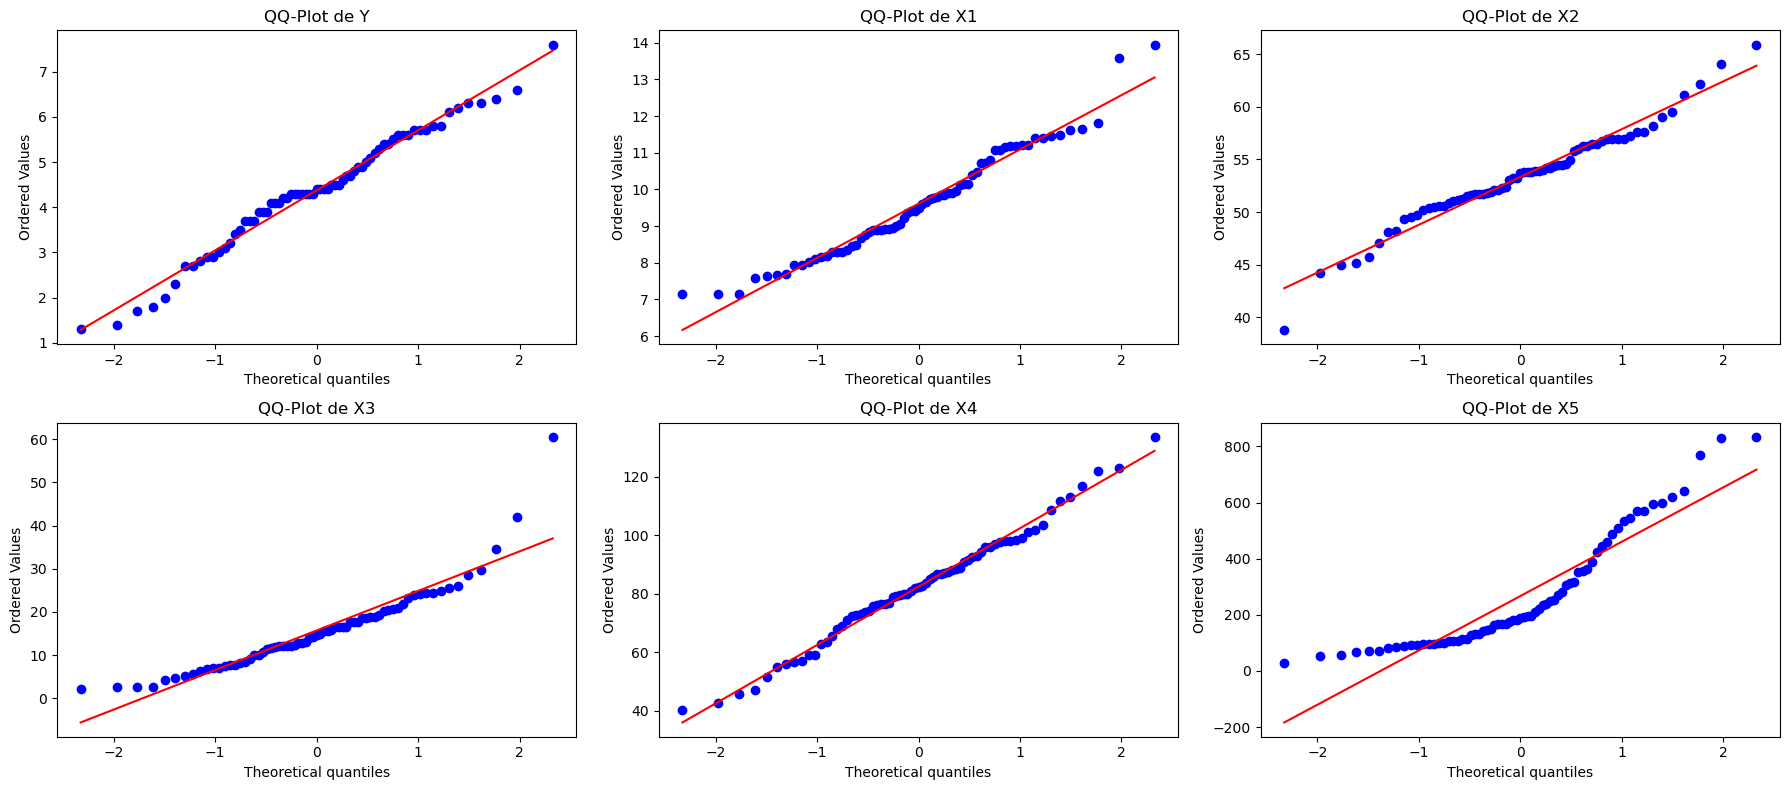

In [6]:
# 1.4 Graficos
num_vars = len(df.columns)
cols = 3  # Número de columnas por fila
rows = (num_vars + cols - 1) // cols  # Calcular filas necesarias
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(6 * cols, 4 * rows))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    stats.probplot(df[col], dist="norm", plot=axes[i])
    axes[i].set_title(f"QQ-Plot de {col}")

# Eliminar gráficos vacíos si hay menos de 'rows * cols' variables
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Análisis variable por variable:**
    
- **Y (Riesgo de infección):** Sigue bastante bien la línea, pero con algunas desviaciones en los extremos. Esto sugiere que en su mayoría sigue una distribución normal, aunque puede haber algunos valores extremos.
- **X1 (Duración de la estadía):** Se ajusta bien a la normalidad, con leves desviaciones en las colas.
- **X2 (Rutina de cultivos):** Presenta un comportamiento similar, con algunas desviaciones en los extremos.
- **X3 (Número de camas):** Muestra algunas desviaciones en los valores más altos, lo que indica posibles outliers.
- **X4 (Censo promedio diario):** Se mantiene bastante alineado, aunque los valores más extremos comienzan a desviarse.
- **X5 (Número de enfermeras):** Tiene una desviación clara en los valores más altos, lo que sugiere una distribución sesgada o la presencia de valores atípicos.

**Conclusión:** La mayoría de las variables siguen una distribución aproximadamente normal, pero X3 y X5 tienen outliers o sesgo.

In [7]:
# 2. Identificación de puntos de balanceo

# Hallamos matriz Hat

# Calcular X'X
XtX = np.dot(X.T, X)

# Calcular la inversa de X'X
XtX_inv = np.linalg.inv(XtX)

# Calcular la matriz hat H
H = np.dot(np.dot(X, XtX_inv), X.T)

# Mostrar la matriz hat
print("Matriz Hat (H):")
print(H)

# Extraer los valores diagonales (leverage)
hat_values = np.diag(H)

# Primeros valores de leverage
print("\nPrimeros valores de leverage:")
print(hat_values[:10])

Matriz Hat (H):
[[ 0.19622731  0.0004659   0.07524903 ...  0.04806643  0.08755508
   0.03952617]
 [ 0.0004659   0.16908152  0.00347708 ...  0.04224888 -0.00404853
   0.07279107]
 [ 0.07524903  0.00347708  0.0597971  ...  0.02405744  0.07352389
   0.00393588]
 ...
 [ 0.04806643  0.04224888  0.02405744 ...  0.04612537  0.02791813
   0.03552336]
 [ 0.08755508 -0.00404853  0.07352389 ...  0.02791813  0.09643504
   0.00221953]
 [ 0.03952617  0.07279107  0.00393588 ...  0.03552336  0.00221953
   0.05890219]]

Primeros valores de leverage:
[0.19622731 0.16908152 0.0597971  0.1200153  0.04040443 0.0852836
 0.03552736 0.07176627 0.05283875 0.06428509]


In [8]:
# Número de predictores + constante
p = X.shape[1]  # Columnas de X (incluye la constante)
n = X.shape[0]  # Número de observaciones

# Umbral de leverage
umbral_leverage = (2 * p) / n

# Extraer valores de leverage (diagonal de la matriz Hat)
hat_values = np.diag(H)

# Identificar observaciones con alto leverage
puntos_balanceo = [(i+1, h) for i, h in enumerate(hat_values) if h > umbral_leverage]

# Imprimir puntos de balanceo detectados
print("\nPuntos de Balanceo (h_i > 2p/n):")
for obs, valor in puntos_balanceo:
    print(f"Observación {obs}: {valor:.3f}")


Puntos de Balanceo (h_i > 2p/n):
Observación 1: 0.196
Observación 14: 0.184
Observación 21: 0.188
Observación 26: 0.179
Observación 27: 0.275
Observación 30: 0.182
Observación 37: 0.381


In [9]:
# 3. Observaciones influenciales

# Calcular Distancia de Cook
distancia_cook = infl.cooks_distance[0]

# Identificar observaciones influyentes (D_i > 1)
puntos_influyentes = [(i + 1, d) for i, d in enumerate(distancia_cook) if d > 1]

# Mostrar los valores de la distancia de Cook para todas las observaciones
print("\nDistancia de Cook para cada observación:")
print(distancia_cook)

# Mostrar observaciones influyentes
if puntos_influyentes:
    print("\nObservaciones influyentes según Distancia de Cook (D_i > 1):")
    for obs, valor in puntos_influyentes:
        print(f"Observación {obs}: {valor:.4f}")
else:
    print("\nNo hay observaciones influyentes según la Distancia de Cook (D_i > 1).")


Distancia de Cook para cada observación:
[7.28630810e-03 3.60144215e-02 1.22657958e-04 1.67007305e-03
 6.37791992e-03 4.09171298e-02 1.62825969e-04 2.64996272e-03
 2.12961016e-03 8.13244559e-04 7.95393225e-03 6.67886370e-04
 2.64189750e-03 2.56438314e-02 3.10757914e-03 4.72192740e-03
 8.04082476e-04 1.93313482e-02 1.96889453e-02 4.41133830e-02
 4.46169118e-03 2.40104188e-02 2.60326161e-04 3.86517440e-03
 2.15943381e-03 8.19571187e-05 6.65099209e-03 5.04304848e-03
 1.94936261e-03 9.90187061e-02 1.18997304e-02 3.25905706e-02
 4.64217232e-03 3.63236210e-02 6.68848585e-02 3.37354702e-02
 4.52516569e-01 8.13713737e-04 4.92491123e-03 3.39607479e-02
 6.84992780e-03 6.92231725e-03 1.69677063e-02 6.60609851e-05
 5.88753932e-04 3.32198128e-03 1.07536719e-02 7.13494506e-03
 4.51115275e-03 4.43162773e-03 2.10592631e-04 3.50995285e-02
 6.73219485e-04 5.64536521e-03 2.39253731e-02 4.67093478e-03
 5.93564005e-02 7.87489812e-04 3.91611111e-04 1.82912525e-02
 7.13135741e-03 1.73572927e-02 3.90862368e-

In [10]:
# Observaciones influyentes según DFFITS

# Calcular DFFITS
dffits_values = infl.dffits[0]

# Definir el umbral de influencia
n = len(dffits_values)  # Número de observaciones
p = X.shape[1] + 1  # Número de predictores + intercepto
umbral = 2 * np.sqrt(p / n)

# Identificar observaciones influyentes
puntos_influyentes_dffits = [(i + 1, d) for i, d in enumerate(dffits_values) if abs(d) > umbral]

# Mostrar todas las observaciones con su DFFITS
print("\nValores de DFFITS para cada observación:")
print(dffits_values)

# Mostrar observaciones influyentes según DFFITS
if puntos_influyentes_dffits:
    print(f"\nObservaciones influyentes según DFFITS (|DFFITS| > {umbral:.4f}):")
    for obs, valor in puntos_influyentes_dffits:
        print(f"Observación {obs}: {valor:.4f}")
else:
    print("\nNo hay observaciones influyentes según DFFITS.")



Valores de DFFITS para cada observación:
[ 0.20771749 -0.46508337  0.02691466  0.09936246 -0.19547721  0.50214002
  0.03101376 -0.12529423  0.112342    0.06933567  0.2179187  -0.06281556
 -0.12508745  0.39125548  0.13588721  0.16722765  0.06901478 -0.34102504
 -0.34887282 -0.52940289 -0.16246107  0.38035034  0.03922629  0.15125289
  0.1132153  -0.02199897 -0.19833888  0.17450977  0.1074883  -0.78140933
  0.26699941 -0.45107982 -0.166279   -0.47454565  0.64758393  0.4551352
 -1.69510607 -0.06943237 -0.1707855   0.45805866  0.20178421  0.20333892
  0.32409433 -0.01975263 -0.05897174  0.14091209  0.25318714 -0.20628932
 -0.16378691  0.16229164 -0.03527162 -0.4668362   0.06310695 -0.18327581
 -0.38043474 -0.16667951  0.60284257 -0.06824097  0.04810081  0.34249575
 -0.20652112 -0.3214584  -0.00480413 -0.26855105  0.29750353 -0.35214688
 -0.27291884  0.11720553  0.07944712]

Observaciones influyentes según DFFITS (|DFFITS| > 0.6370):
Observación 30: -0.7814
Observación 35: 0.6476
Observació

In [11]:
# Análisis de modelo con y sin outliers

# Métricas del modelo con outliers
r2_completo = modelo.rsquared
r2_adj_completo = modelo.rsquared_adj
mse_completo = mean_squared_error(y, modelo.fittedvalues)
rmse_completo = np.sqrt(mse_completo)

# Eliminar valores atípicos
outliers = [19, 36, 59]  # Restando 1 porque en Python los índices empiezan en 0
df_sin_outliers = df.drop(index=outliers)

# Definir variables sin outliers
X_sin_outliers = df_sin_outliers.drop(columns=["Y"])
Y_sin_outliers = df_sin_outliers["Y"]
X_sin_outliers = sm.add_constant(X_sin_outliers)

# Ajustar modelo sin los outliers
modelo_sin_outliers = sm.OLS(Y_sin_outliers, X_sin_outliers).fit()

# Métricas del modelo sin outliers
r2_sin = modelo_sin_outliers.rsquared
r2_adj_sin = modelo_sin_outliers.rsquared_adj
mse_sin = mean_squared_error(Y_sin_outliers, modelo_sin_outliers.fittedvalues)
rmse_sin = np.sqrt(mse_sin)

# Comparar Homocedasticidad con Breusch-Pagan
bp_test_completo = het_breuschpagan(modelo.resid, X)
bp_test_sin = het_breuschpagan(modelo_sin_outliers.resid, X_sin_outliers)

# Resultados
print("### Comparación de Modelos ###")
print("\n--- Modelo con Outliers ---")
print(f"R^2: {r2_completo:.4f}, R^2 Ajustado: {r2_adj_completo:.4f}")
print(f"MSE: {mse_completo:.4f}, RMSE: {rmse_completo:.4f}")
print(f"Prueba Breusch-Pagan (p-valor): {bp_test_completo[1]:.4f}")

print("\n--- Modelo sin Outliers ---")
print(f"R^2: {r2_sin:.4f}, R^2 Ajustado: {r2_adj_sin:.4f}")
print(f"MSE: {mse_sin:.4f}, RMSE: {rmse_sin:.4f}")
print(f"Prueba Breusch-Pagan (p-valor): {bp_test_sin[1]:.4f}")

# Comparación de coeficientes
print("\n--- Comparación de Coeficientes ---")
coef_completo = modelo.params
coef_sin_outliers = modelo_sin_outliers.params
comparacion_coef = pd.DataFrame({"Con Outliers": coef_completo, "Sin Outliers": coef_sin_outliers})
print(comparacion_coef)

### Comparación de Modelos ###

--- Modelo con Outliers ---
R^2: 0.4958, R^2 Ajustado: 0.4558
MSE: 0.8574, RMSE: 0.9259
Prueba Breusch-Pagan (p-valor): 0.3218

--- Modelo sin Outliers ---
R^2: 0.5432, R^2 Ajustado: 0.5051
MSE: 0.7137, RMSE: 0.8448
Prueba Breusch-Pagan (p-valor): 0.0793

--- Comparación de Coeficientes ---
       Con Outliers  Sin Outliers
const     -3.263293     -2.878024
X1         0.276837      0.257569
X2         0.059871      0.052682
X3         0.048454      0.063305
X4         0.008533      0.007825
X5         0.001205      0.001344


**Conclusión sobre métricas:**
- 𝑅^2 y 𝑅^2 ajustado mejoran, indicando que el modelo sin outliers explica mejor la variabilidad de los datos.
- MSE y RMSE disminuyen, lo que sugiere que el modelo sin outliers tiene menor error de predicción.
- Prueba de Breusch-Pagan: El modelo sin outliers tiene un p-valor menor (0.0793), lo que sugiere que la varianza de los residuos podría ser más homogénea.
- La constante cambia, lo que indica que el modelo sin outliers ajusta mejor la intersección.
- X3 tiene un aumento considerable, lo que indica que los outliers afectaban fuertemente su coeficiente.
- X1, X4 y X5 apenas cambian, por lo que los outliers no las afectaban significativamente.

**Conclusión Final:** ¿Es mejor el modelo sin outliers?
**Sí, parece mejor, porque:**
- Explica más variabilidad (𝑅^2 y 𝑅^2 ajustado mayor).
- Reduce el error de predicción (RMSE y MSE menores).
- Mejora la estabilidad de los coeficientes.
- Posible mejora en la homocedasticidad (Breusch-Pagan con p-valor más bajo).

In [12]:
# Análisis de modelo con y sin puntos de balanceo

# Métricas del modelo con puntos de balanceo
r2_completo = modelo.rsquared
r2_adj_completo = modelo.rsquared_adj
mse_completo = mean_squared_error(y, modelo.fittedvalues)
rmse_completo = np.sqrt(mse_completo)

# Eliminar puntos de balanceo
puntos_balanceo = [0, 13, 20, 25, 26, 29, 36]  # Restando 1 porque Python indexa desde 0
df_sin_balanceo = df.drop(index=puntos_balanceo)

# Ajustar el modelo sin puntos de balanceo
X_sin_balanceo = df_sin_balanceo.drop(columns=["Y"])
Y_sin_balanceo = df_sin_balanceo["Y"]
X_sin_balanceo = sm.add_constant(X_sin_balanceo)

modelo_sin_balanceo = sm.OLS(Y_sin_balanceo, X_sin_balanceo).fit()

# **Métricas del modelo sin puntos de balanceo**
r2_sin = modelo_sin_balanceo.rsquared
r2_adj_sin = modelo_sin_balanceo.rsquared_adj
mse_sin = mean_squared_error(Y_sin_balanceo, modelo_sin_balanceo.fittedvalues)
rmse_sin = np.sqrt(mse_sin)

# **5. Comparación de homocedasticidad con Breusch-Pagan**
bp_test_completo = het_breuschpagan(modelo.resid, X)
bp_test_sin = het_breuschpagan(modelo_sin_balanceo.resid, X_sin_balanceo)

# **6. Mostrar resultados**
print("### Comparación de Modelos ###")
print("\n--- Modelo con Puntos de Balanceo ---")
print(f"R^2: {r2_completo:.4f}, R^2 Ajustado: {r2_adj_completo:.4f}")
print(f"MSE: {mse_completo:.4f}, RMSE: {rmse_completo:.4f}")
print(f"Prueba Breusch-Pagan (p-valor): {bp_test_completo[1]:.4f}")

print("\n--- Modelo sin Puntos de Balanceo ---")
print(f"R^2: {r2_sin:.4f}, R^2 Ajustado: {r2_adj_sin:.4f}")
print(f"MSE: {mse_sin:.4f}, RMSE: {rmse_sin:.4f}")
print(f"Prueba Breusch-Pagan (p-valor): {bp_test_sin[1]:.4f}")

# **7. Comparación de coeficientes**
print("\n--- Comparación de Coeficientes ---")
coef_completo = modelo.params
coef_sin_balanceo = modelo_sin_balanceo.params
comparacion_coef = pd.DataFrame({"Con Balanceo": coef_completo, "Sin Balanceo": coef_sin_balanceo})
print(comparacion_coef)

### Comparación de Modelos ###

--- Modelo con Puntos de Balanceo ---
R^2: 0.4958, R^2 Ajustado: 0.4558
MSE: 0.8574, RMSE: 0.9259
Prueba Breusch-Pagan (p-valor): 0.3218

--- Modelo sin Puntos de Balanceo ---
R^2: 0.5313, R^2 Ajustado: 0.4895
MSE: 0.8130, RMSE: 0.9016
Prueba Breusch-Pagan (p-valor): 0.1007

--- Comparación de Coeficientes ---
       Con Balanceo  Sin Balanceo
const     -3.263293     -3.604626
X1         0.276837      0.219203
X2         0.059871      0.061058
X3         0.048454      0.068856
X4         0.008533      0.012534
X5         0.001205      0.002227


**Conclusión sobre métricas:**
- El modelo sin puntos de balanceo es mejor en términos de 𝑅^2 y 𝑅^2 ajustado, , MSE y RMSE.
- La prueba de Breusch-Pagan muestra que los residuos podrían tener más heterocedasticidad tras eliminar los puntos de balanceo (p-valor más bajo).
- X1 (Duración de estadía) baja, lo que sugiere que los puntos de balanceo tenían un impacto importante en esta variable.
- X3, X4 y X5 aumentan, lo que podría indicar que antes su efecto estaba subestimado debido a los puntos de balanceo.
- X2 apenas cambia, lo que indica que los puntos de balanceo no afectaban mucho esta variable.
- La constante es más negativa, lo que sugiere un ajuste global distinto.

**Conclusión Final:** ¿Es mejor el modelo sin puntos de balanceo?
- En términos de 𝑅^2, 𝑅^2 ajustado, RMSE y MSE,  el modelo sin puntos de balanceo es mejor.
- Pero puede haber problemas de heterocedasticidad (Breusch-Pagan se acerca a 0.05).

In [13]:
# Análisis del modelo con y sin puntos influenciales

# Métricas del modelo con observaciones influyentes
r2_completo = modelo.rsquared
r2_adj_completo = modelo.rsquared_adj
mse_completo = mean_squared_error(y, modelo.fittedvalues)
rmse_completo = np.sqrt(mse_completo)

# Eliminar observaciones influyentes según DFFITS
obs_influyentes = [29, 34, 36]  # Restando 1 porque Python indexa desde 0
df_sin_influyentes = df.drop(index=obs_influyentes)

# Ajustar el modelo sin observaciones influyentes
X_sin_influyentes = df_sin_influyentes.drop(columns=["Y"])
Y_sin_influyentes = df_sin_influyentes["Y"]
X_sin_influyentes = sm.add_constant(X_sin_influyentes)

modelo_sin_influyentes = sm.OLS(Y_sin_influyentes, X_sin_influyentes).fit()

# Métricas del modelo sin observaciones influyentes
r2_sin = modelo_sin_influyentes.rsquared
r2_adj_sin = modelo_sin_influyentes.rsquared_adj
mse_sin = mean_squared_error(Y_sin_influyentes, modelo_sin_influyentes.fittedvalues)
rmse_sin = np.sqrt(mse_sin)

# Comparación de homocedasticidad con Breusch-Pagan
bp_test_completo = het_breuschpagan(modelo.resid, X)
bp_test_sin = het_breuschpagan(modelo_sin_influyentes.resid, X_sin_influyentes)

# Mostrar resultados
print("### Comparación de Modelos ###")
print("\n--- Modelo con Observaciones Influyentes ---")
print(f"R^2: {r2_completo:.4f}, R^2 Ajustado: {r2_adj_completo:.4f}")
print(f"MSE: {mse_completo:.4f}, RMSE: {rmse_completo:.4f}")
print(f"Prueba Breusch-Pagan (p-valor): {bp_test_completo[1]:.4f}")

print("\n--- Modelo sin Observaciones Influyentes ---")
print(f"R^2: {r2_sin:.4f}, R^2 Ajustado: {r2_adj_sin:.4f}")
print(f"MSE: {mse_sin:.4f}, RMSE: {rmse_sin:.4f}")
print(f"Prueba Breusch-Pagan (p-valor): {bp_test_sin[1]:.4f}")

# Comparación de coeficientes
print("\n--- Comparación de Coeficientes ---")
coef_completo = modelo.params
coef_sin_influyentes = modelo_sin_influyentes.params
comparacion_coef = pd.DataFrame({"Con Influyentes": coef_completo, "Sin Influyentes": coef_sin_influyentes})
print(comparacion_coef)

### Comparación de Modelos ###

--- Modelo con Observaciones Influyentes ---
R^2: 0.4958, R^2 Ajustado: 0.4558
MSE: 0.8574, RMSE: 0.9259
Prueba Breusch-Pagan (p-valor): 0.3218

--- Modelo sin Observaciones Influyentes ---
R^2: 0.5393, R^2 Ajustado: 0.5009
MSE: 0.7347, RMSE: 0.8571
Prueba Breusch-Pagan (p-valor): 0.0596

--- Comparación de Coeficientes ---
       Con Influyentes  Sin Influyentes
const        -3.263293        -2.537571
X1            0.276837         0.225949
X2            0.059871         0.045333
X3            0.048454         0.072326
X4            0.008533         0.009438
X5            0.001205         0.001713


**Conclusión sobre métricas:**
- El modelo sin observaciones influyentes es mejor en términos de 𝑅^2 y 𝑅^2 ajustado, MSE y RMSE, lo que indica que las observaciones influyentes estaban afectando el modelo.
- Pero la prueba de Breusch-Pagan indica un posible problema de heterocedasticidad en el modelo sin influyentes (p-valor cercano a 0.05).
- X1 y X2 disminuyen, lo que indica que las observaciones influyentes estaban amplificando su efecto.
- X3, X4 y X5 aumentan, lo que sugiere que su impacto estaba subestimado antes.
- La constante es menos negativa, lo que sugiere que el modelo general está ajustando los valores de Y de manera diferente.

**Conclusión Final:** ¿Es mejor el modelo sin puntos influyentes?
- En términos de 𝑅^2, 𝑅^2 ajustado, RMSE y MSE,  el modelo sin influyentes es mejor.
- Pero puede haber problemas de heterocedasticidad (Breusch-Pagan indica que la varianza de los residuos podría no ser constante).

**2.** Tenga en cuenta el análisis de multicolinealidad hecho en el trabajo #3. Explique.

In [23]:
#Calculo de VIF para ambos modelos

# Función para calcular VIF
def calcular_vif(X):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_data = vif_data[vif_data["Variable"] != "const"]
    return vif_data

print("\n--- VIF para el Modelo Original (todas las variables) ---")
X_original = df[['X1', 'X2', 'X3', 'X4', 'X5']]
X_original = sm.add_constant(X_original)
print(calcular_vif(X_original))


--- VIF para el Modelo Original (todas las variables) ---
  Variable       VIF
1       X1  1.520291
2       X2  1.103331
3       X3  1.225446
4       X4  1.293994
5       X5  1.281338


**Interpretaciones:**

**Modelo Original:**
- Todas las variables tienen VIF < 5, lo que indica que no hay multicolinealidad problemática en el modelo original.
- Los valores de VIF son bajos, por lo que las variables no están altamente correlacionadas entre sí.

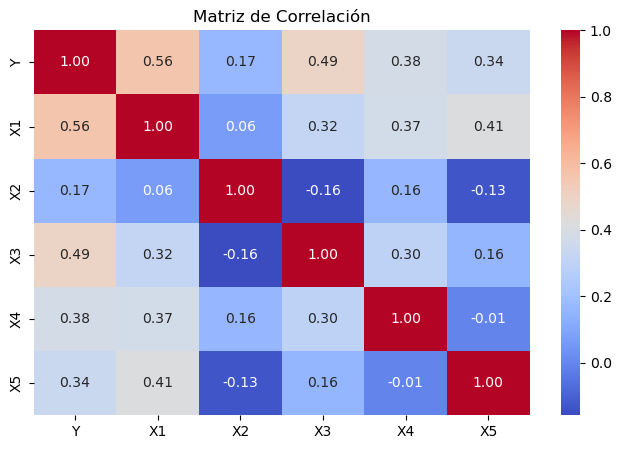

In [24]:
#Analicemos correlaciones para comprobar

# Matriz de correlación y heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**Observaciones del gráfico:**

**Correlación con la variable dependiente (Y - Riesgo de infección):**

- **X1 (Duración de la estadía):** tiene una correlación de 0.56 con Y, lo que sugiere una relación moderada-positiva: a mayor tiempo de estadía, mayor riesgo de infección.

- **X3 (Número de camas):** tiene una correlación de 0.49, también positiva, lo que indica que hospitales más grandes tienden a tener un mayor riesgo de infección.

- **X4 (Censo promedio diario) y X5 (Número de enfermeras):** tienen correlaciones más bajas (0.38 y 0.34, respectivamente), lo que sugiere una relación positiva pero más débil con Y.

- **X2 (Rutina de cultivos):** tiene una correlación muy baja (0.17), lo que indica que su impacto en el riesgo de infección es más incierto.

**Correlaciones entre variables predictoras:**

- X1 y X5 tienen una correlación moderada de 0.41, lo que podría indicar que hospitales con mayor duración de estadía tienden a tener más enfermeras.

- X1 y X3/X4 muestran correlaciones moderadas (0.32 y 0.37), sugiriendo que hospitales con mayor duración de estadía también tienden a tener más camas y más pacientes por día.

- X2 (Rutina de cultivos) tiene una relación baja o negativa con las demás variables, lo que indica que su comportamiento es independiente.

**Multicolinealidad:**

No hay una correlación extremadamente alta (>0.8) entre variables predictoras, lo cual es bueno porque significa que no hay un problema grave de multicolinealidad.

**3.** Seleccione el mejor modelo manualmente. Explique.

**Análisis:**

**Ajuste del Modelo (𝑅^2 y 𝑅^2 ajustado)**
- El modelo sin outliers tiene el mayor 𝑅^2 ajustado (0.5051), lo que indica que es el que mejor explica la variabilidad de la variable respuesta.

**Error del Modelo (MSE y RMSE)**
- El modelo sin outliers tiene el menor error (MSE: 0.7137, RMSE: 0.8448), lo que indica mejores predicciones.

**Prueba de Heterocedasticidad (Breusch-Pagan)**
- El modelo original tiene el mejor p-valor (0.3218), lo que sugiere ausencia de heterocedasticidad.
- El modelo sin outliers tiene un p-valor de 0.0793, lo que indica posible heterocedasticidad leve.
- El modelo sin puntos influyentes tiene el menor p-valor (0.0596), lo que sugiere que podría ser el más problemático.

**Elección del Mejor Modelo**
- El modelo sin outliers es el mejor.
- Tiene el mayor 𝑅^2 ajustado (0.5051).
- Tiene el menor error (MSE: 0.7137, RMSE: 0.8448).
- Presenta posible heterocedasticidad, pero su p-valor (0.0793) no es alarmante.

**Análisis de los modelos por MSE**

In [33]:
# Obtener nombres de columnas (excluyendo la variable dependiente)
independent_variables = df_sin_outliers.columns.drop('Y')

# Crear una lista para almacenar los modelos de regresión lineal múltiple con combinaciones de variables
models = {}
rsquared_multiple = {}

# Iterar sobre todas las posibles combinaciones de variables independientes (excepto la combinación vacía)

for i in range(1, len(independent_variables) + 1):
    for combination in itertools.combinations(independent_variables, i):
        formula_multiple = f"Y ~ {' + '.join(combination)}"
        model_multiple = smf.ols(formula=formula_multiple, data=df_sin_outliers).fit()
        model_name = ' + '.join(combination)
        models[model_name] = model_multiple
        rsquared_multiple[model_name] = model_multiple.mse_model
        print(f"MSE MODELO {model_name}: {rsquared_multiple[model_name]}")

MSE MODELO X1: 33.924796976307064
MSE MODELO X2: 4.162213378665896
MSE MODELO X3: 28.586580948622256
MSE MODELO X4: 16.96558689579048
MSE MODELO X5: 10.70360949111189
MSE MODELO X1 + X2: 18.08832135520607
MSE MODELO X1 + X3: 24.111875255819307
MSE MODELO X1 + X4: 19.175119218991803
MSE MODELO X1 + X5: 17.522813302885005
MSE MODELO X2 + X3: 16.944633010456805
MSE MODELO X2 + X4: 9.40208598169275
MSE MODELO X2 + X5: 8.08836941369939
MSE MODELO X3 + X4: 17.207397243600838
MSE MODELO X3 + X5: 19.43433364941361
MSE MODELO X4 + X5: 14.041067459158171
MSE MODELO X1 + X2 + X3: 17.168097332361086
MSE MODELO X1 + X2 + X4: 13.266595261642115
MSE MODELO X1 + X2 + X5: 12.602437521248723
MSE MODELO X1 + X3 + X4: 16.506082829572936
MSE MODELO X1 + X3 + X5: 16.84953647986112
MSE MODELO X1 + X4 + X5: 13.518424465457395
MSE MODELO X2 + X3 + X4: 12.620376389273574
MSE MODELO X2 + X3 + X5: 15.202034756518918
MSE MODELO X2 + X4 + X5: 10.272224526577588
MSE MODELO X3 + X4 + X5: 15.007610029037004
MSE MODELO

**Análisis de los modelos por R^2 adjustado**

In [34]:
# Obtener nombres de columnas (excluyendo la variable dependiente)
independent_variables = df_sin_outliers.columns.drop('Y')

# Crear una lista para almacenar los modelos de regresión lineal múltiple con combinaciones de variables
models = {}
rsquared_multiple = {}

# Iterar sobre todas las posibles combinaciones de variables independientes (excepto la combinación vacía)

for i in range(1, len(independent_variables) + 1):
    for combination in itertools.combinations(independent_variables, i):
        formula_multiple = f"Y ~ {' + '.join(combination)}"
        model_multiple = smf.ols(formula=formula_multiple, data=df_sin_outliers).fit()
        model_name = ' + '.join(combination)
        models[model_name] = model_multiple
        rsquared_multiple[model_name] = model_multiple.rsquared_adj
        print(f"R2 AJUSTADO MODELO {model_name}: {rsquared_multiple[model_name]}")

R2 AJUSTADO MODELO X1: 0.31851230463924574
R2 AJUSTADO MODELO X2: 0.025370109289883924
R2 AJUSTADO MODELO X3: 0.26593432999968203
R2 AJUSTADO MODELO X4: 0.15147505607230105
R2 AJUSTADO MODELO X5: 0.08979862944040529
R2 AJUSTADO MODELO X1 + X2: 0.3302263145914781
R2 AJUSTADO MODELO X1 + X3: 0.45076596533512747
R2 AJUSTADO MODELO X1 + X4: 0.3519746440812066
R2 AJUSTADO MODELO X1 + X5: 0.3189097157456434
R2 AJUSTADO MODELO X2 + X3: 0.30733952783563556
R2 AJUSTADO MODELO X2 + X4: 0.15640272216146212
R2 AJUSTADO MODELO X2 + X5: 0.1301134353226835
R2 AJUSTADO MODELO X3 + X4: 0.3125978038324486
R2 AJUSTADO MODELO X3 + X5: 0.3571618836122711
R2 AJUSTADO MODELO X4 + X5: 0.24923516233320397
R2 AJUSTADO MODELO X1 + X2 + X3: 0.475260860502972
R2 AJUSTADO MODELO X1 + X2 + X4: 0.35626027761405554
R2 AJUSTADO MODELO X1 + X2 + X5: 0.3360026545744157
R2 AJUSTADO MODELO X1 + X3 + X4: 0.45506860883048017
R2 AJUSTADO MODELO X1 + X3 + X5: 0.46554436504918384
R2 AJUSTADO MODELO X1 + X4 + X5: 0.3639413762010

**Análisis por método automatico**

In [40]:
y = df_sin_outliers["Y"]
x = df_sin_outliers.drop(columns=["Y"])

estimador = LinearRegression()

selector = SequentialFeatureSelector(estimador, n_features_to_select="auto", direction='backward', scoring="neg_mean_squared_error", cv = 5)
selector.fit(x, y)

selector.get_support()

features_select = x.columns[selector.get_support()]

print("Utilizando backward",features_select)

Utilizando backward Index(['X1', 'X3', 'X5'], dtype='object')


In [42]:
y = df_sin_outliers["Y"]
x = df_sin_outliers.drop(columns=["Y"])

estimador = LinearRegression()

selector = SequentialFeatureSelector(estimador, n_features_to_select="auto", direction='forward', scoring="neg_mean_squared_error", cv = 5)
selector.fit(x, y)

selector.get_support()

features_select = x.columns[selector.get_support()]

print("Utilizando forward",features_select)

Utilizando forward Index(['X1', 'X3'], dtype='object')


**Conclusión:** Teniendo en cuenta los valores de R^2, MSE, la cantidad de variables e implementando el método automático con forward y backward, llegamos a la conclusión de que el mejor modelo es implementando X1, X3 y X5.

**4.** Realice la validación de los supuestos de los residuales del modelo seleccionado.

Fórmula del modelo: y ~ X
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.490
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     19.87
Date:                Tue, 01 Apr 2025   Prob (F-statistic):           3.84e-09
Time:                        23:13:09   Log-Likelihood:                -86.140
No. Observations:                  66   AIC:                             180.3
Df Residuals:                      62   BIC:                             189.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0146     

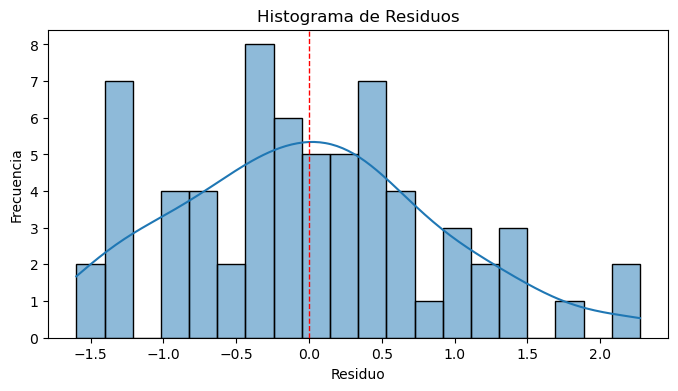

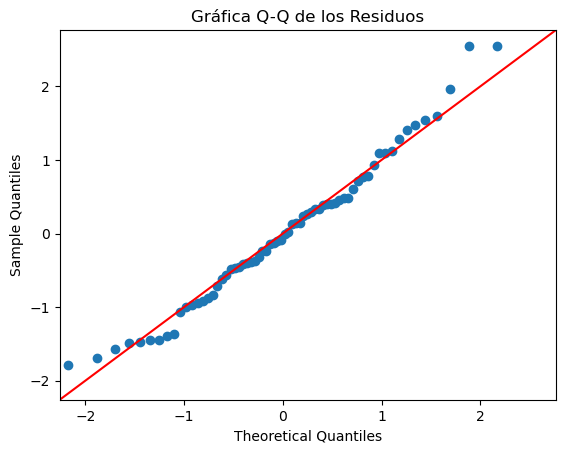

Prueba de Shapiro-Wilk: p-valor = 0.2768


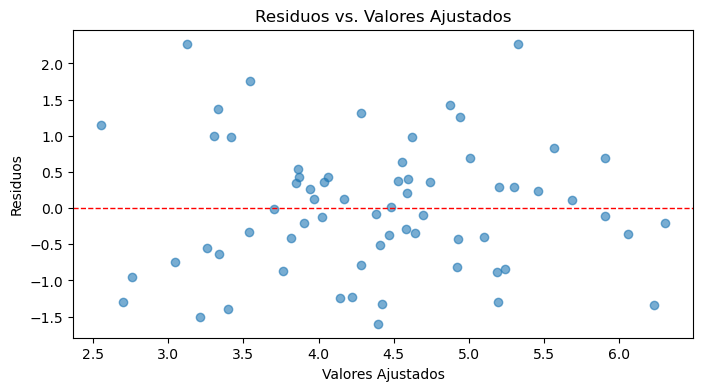

Prueba de Breusch-Pagan: p-valor = 0.0431
Prueba de Durbin-Watson: 1.7428


In [44]:
# Mejor modelo
y = df_sin_outliers["Y"] 
X = df_sin_outliers.drop(columns=["Y","X2","X4"])

# Crear la fórmula para el modelos.
formula = 'y ~ X'
print("Fórmula del modelo:", formula)

# Ajustar el modelo de regresión lineal múltiple utilizando la interfaz de fórmulas
modelo_elegido = smf.ols(formula, data=df_sin_outliers).fit()

# Mostrar los parámetros estimados y resumen del modelo_nada
print(modelo_elegido.summary())
modelo_elegido.mse_model

# Calcular residuos del modelo sin outliers
residuos = modelo_elegido.resid
valores_ajustados = modelo_elegido.fittedvalues

# 1. Prueba de Normalidad de los Residuales

# Histograma de los residuos
plt.figure(figsize=(8,4))
sns.histplot(residuos, kde=True, bins=20)
plt.axvline(residuos.mean(), color='red', linestyle='dashed', linewidth=1)
plt.title("Histograma de Residuos")
plt.xlabel("Residuo")
plt.ylabel("Frecuencia")
plt.show()

# Gráfica Q-Q Plot
sm.qqplot(residuos, line='45', fit=True)
plt.title("Gráfica Q-Q de los Residuos")
plt.show()

# Prueba de Shapiro-Wilk
shapiro_test = stats.shapiro(residuos)
print(f"Prueba de Shapiro-Wilk: p-valor = {shapiro_test.pvalue:.4f}")

# 2. Prueba de Homocedasticidad

# Gráfico de residuos vs valores ajustados
plt.figure(figsize=(8,4))
plt.scatter(valores_ajustados, residuos, alpha=0.6)
plt.axhline(0, color='red', linestyle='dashed', linewidth=1)
plt.title("Residuos vs. Valores Ajustados")
plt.xlabel("Valores Ajustados")
plt.ylabel("Residuos")
plt.show()

# Prueba de Breusch-Pagan
from statsmodels.stats.diagnostic import het_breuschpagan
bp_test = het_breuschpagan(residuos, modelo_sin_outliers.model.exog)
print(f"Prueba de Breusch-Pagan: p-valor = {bp_test[1]:.4f}")

# 3. Prueba de Independencia de los Errores

# Prueba de Durbin-Watson
dw_test = durbin_watson(residuos)
print(f"Prueba de Durbin-Watson: {dw_test:.4f}")

**1. Interpretación del Histograma de Residuos**

**Distribución no completamente normal:**
- Gráficamente se observa hay cierta asimetría y algunos picos irregulares.
- Según la prueba de Jarque-Bera (JB), se obtiene que los residuos siguen una distribución normal.

**2. Interpretación de la Gráfica Q-Q (Quantile-Quantile Plot)**

**Los puntos siguen en gran medida la línea roja:**
- La mayoría de los puntos están alineados con la diagonal roja, lo que sugiere que los residuos siguen aproximadamente una distribución normal.

**3. Interpretación de la Prueba de Shapiro-Wilk**

**Interpretación del p-valor (0.2768):**
- Hipótesis Nula (H0): Los residuos siguen una distribución normal.
- Hipótesis Alternativa (Ha): Los residuos no siguen una distribución normal.
- Como el p-valor = 0.2768 es mayor que un umbral típico de significancia (α = 0.05 o α = 0.01), NO rechazamos H0.

**4. Interpretación del Gráfico de Residuos vs. Valores Ajustados**

**Dispersión aleatoria:**
- Los residuos parecen estar distribuidos de manera dispersa alrededor de la línea roja (residuo = 0), sin una tendencia clara.
- Esto sugiere que no hay una relación sistemática entre los residuos y los valores ajustados.

**Ausencia de un patrón en forma de "cono":**
- No se observa un patrón de expansión o contracción en la dispersión de los puntos.
- Esto indica que la varianza de los residuos es aproximadamente constante, lo que es una buena señal para el supuesto de homocedasticidad.

**5. Prueba de Breusch-Pagan (Homocedasticidad):**
- H0: Los residuos tienen varianza constante (homocedasticidad).
- Ha: Los residuos tienen varianza no constante (heterocedasticidad).
- El p-valor 0.0431 es menor que 0.05, por lo que podrían haber indicios de heterocedasticidad.

**6. Prueba de Durbin-Watson (Autocorrelación de los Residuos):**
- El estadístico 1.7428 está cerca de 2, lo que indica que no hay autocorrelación significativa en los residuos.
- Esto sugiere que los errores son independientes, lo cual es un buen indicador de un modelo bien especificado.